# Information about Dataset
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing one subject. Each file has the EEG recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. 
Here, we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. 

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

1 - Recording of seizure activity

2 - They recorder the EEG from the area where the tumor was located.

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area.

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed.

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open


All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

Dataset: please click [here](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition#)


# Aim: Detecting Epileptic seizure using Binary Classification of Time Series Data

The aim of this Binary classification is to classify an EEG signal to either epileptic or not i.e whether an EEG signal belongs to class 1 or not

# Data Exploration

In [36]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

In [37]:
# Pre-processing of dataframe
df = pd.read_csv("/content/data.csv")
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


In [38]:
columns = list(df.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'Class' )
df.columns = columns
df = df.set_index("ID")

Class = df.Class
df = df.drop(['Class'], axis = 1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [54]:
Class

ID
X21.V1.791    4
X15.V1.924    1
X8.V1.1       5
X16.V1.60     5
X20.V1.54     5
             ..
X22.V1.114    2
X19.V1.354    1
X8.V1.28      5
X10.V1.932    3
X16.V1.210    4
Name: Class, Length: 11500, dtype: int64

In [41]:
# Obtaining information of basic descriptors
description = {}
descriptors = ['Mean','Standard Deviation','Min','Q1','Median','Q3','Max']

for index, row in df.iterrows():
    description[index] = [np.mean(row), np.std(row), min(row), np.quantile(row,0.25),
                          np.median(row), np.quantile(row,0.75), max(row)]

description_df = pd.DataFrame(description).transpose()
description_df.columns = descriptors
description_df = pd.concat([description_df,Class], axis=1)
description_df

,Mean,Standard Deviation,Min,Q1,Median,Q3,Max,Class
ID,,,,,,,,
X21.V1.791,-16.910112,95.710958,-281.0,-78.50,-11.5,49.75,229.0,4
X15.V1.924,28.112360,471.835823,-1716.0,-90.50,220.5,325.50,513.0,1
X8.V1.1,-44.044944,44.186380,-126.0,-77.75,-44.5,-15.00,80.0,5
X16.V1.60,-68.910112,15.923723,-105.0,-80.00,-69.0,-60.00,-22.0,5
X20.V1.54,-6.651685,38.693001,-103.0,-32.00,-1.0,22.75,78.0,5
...,...,...,...,...,...,...,...,...
X22.V1.114,5.157303,38.268536,-79.0,-23.00,7.5,38.00,73.0,2
X19.V1.354,5.674157,163.078548,-388.0,-92.50,27.5,103.75,471.0,1
X8.V1.28,6.752809,44.164855,-90.0,-22.00,8.5,35.00,121.0,5


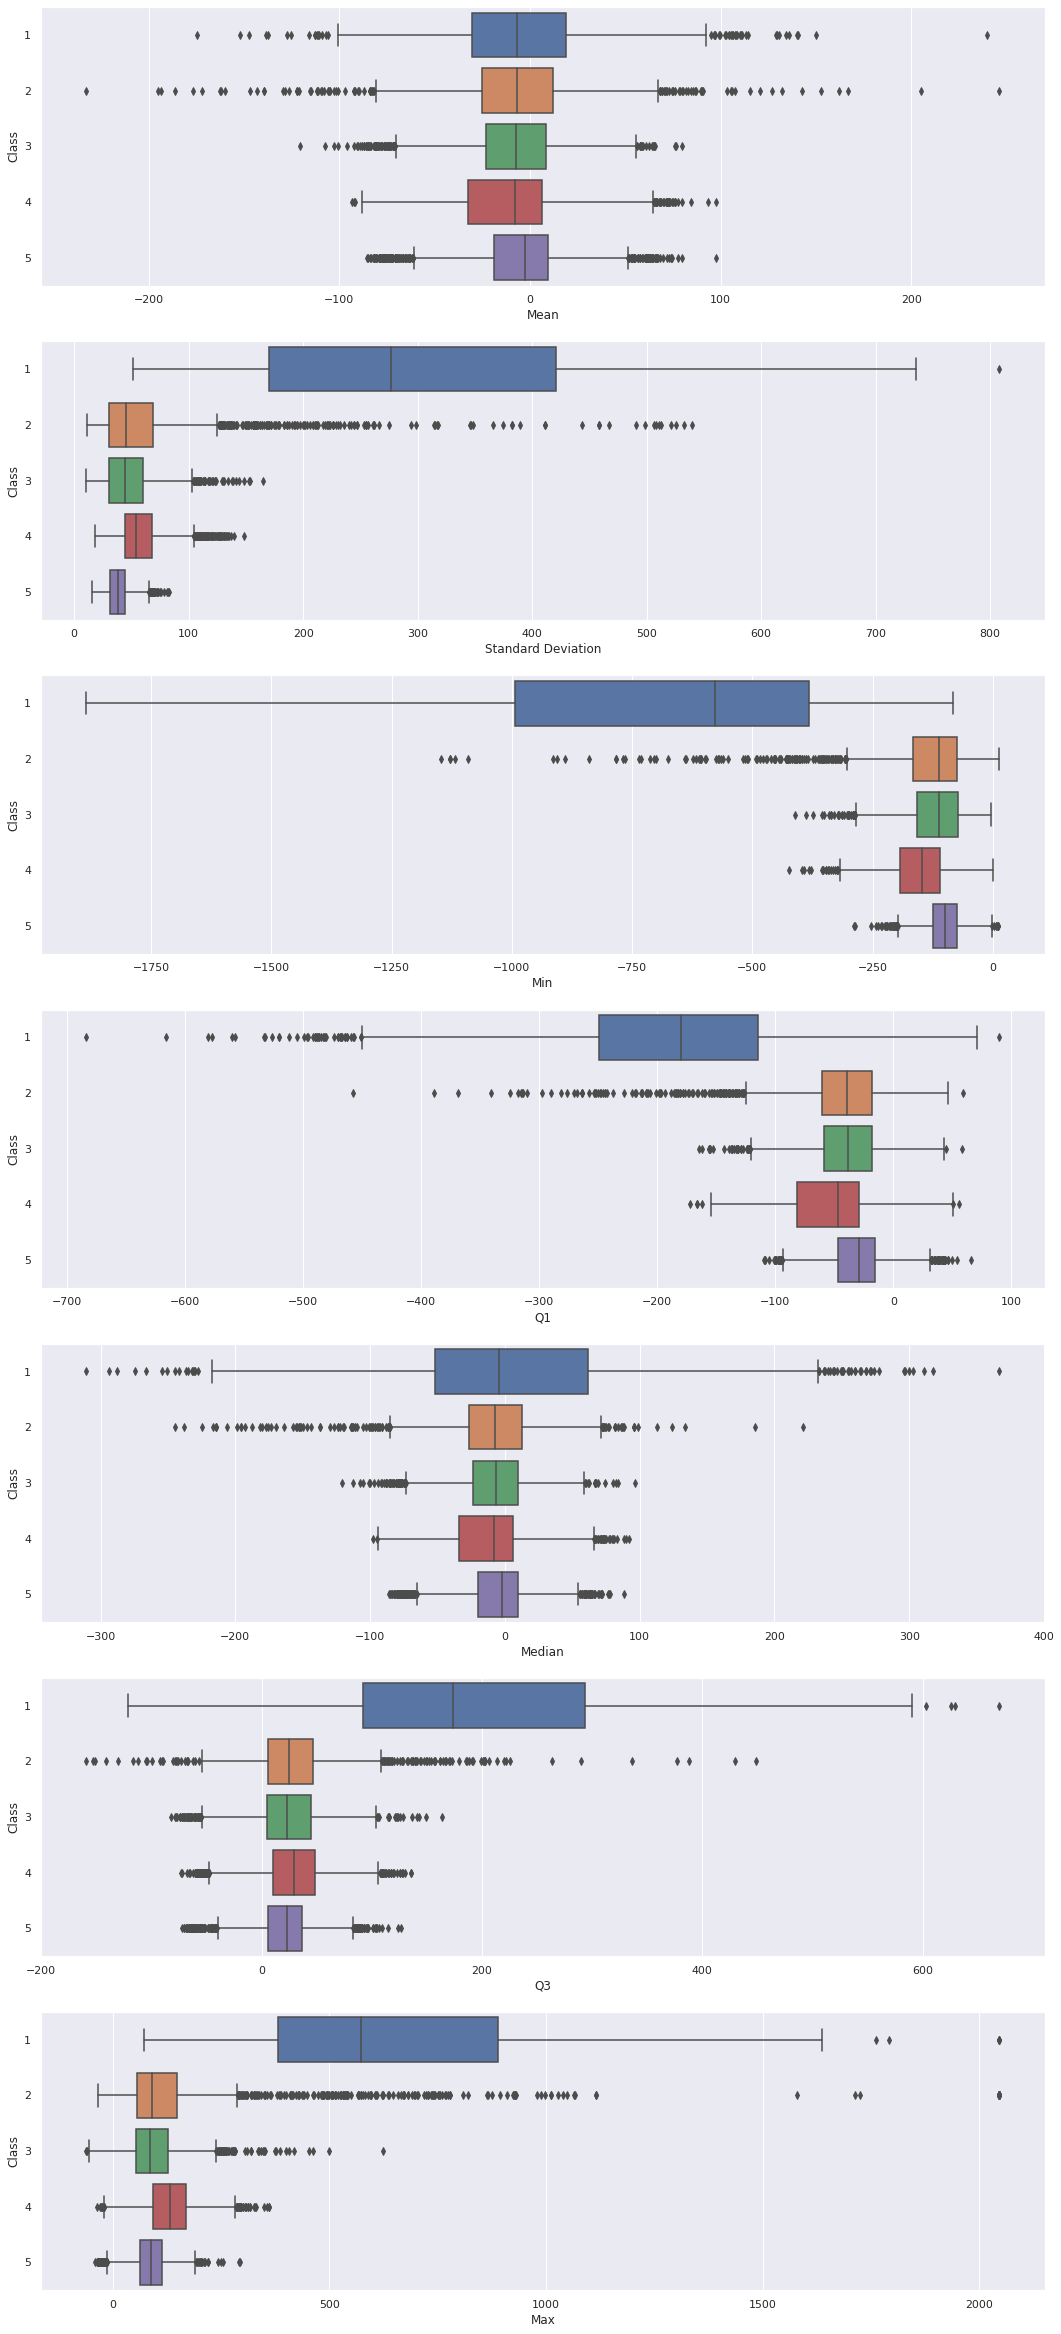

In [52]:
#Plotting basic descriptors against the classes
f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in descriptors:
    sb.boxplot(x = var, y = "Class", data = description_df, orient = "h", ax = axes[count])
    count += 1

From the boxplots above, we can see that Class 1 is significantly different from the rest of the classes. It has a much higher change in amplitude over the sampling period as compared to the other classes. 

In [81]:
df = pd.read_csv (r'/content/data.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


#Data Cleaning

In [85]:
#Cleaning patient ID for example: 
                                #X21.V1.791 --> 791
patient_ID = [df['Unnamed: 0'][i] for i in range(len(df))]
time_data = [None for i in range(len(df))]
for i in range(len(patient_ID)):
    position_V = patient_ID[i].index('V')
    time_data[i] = int(patient_ID[i][1:position_V-1])
    patient_ID[i] = patient_ID[i][position_V+1:]
    patient_ID[i] = patient_ID[i].replace('.','0')
    patient_ID[i] = int(patient_ID[i])

df.insert(1, 'ID', patient_ID)
df.insert(0, 'Time', time_data)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.sort_values(["y","ID","Time"])
df = df.set_index(['ID'])
df

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,1,100,124,153,185,210,220,216,222,240,265,298,330,362,381,391,390,390,392,395,397,397,393,380,356,334,322,320,322,338,332,317,263,195,142,108,97,80,80,85,...,62,242,448,670,826,885,754,554,360,196,23,-162,-323,-430,-554,-798,-986,-973,-701,-313,-49,63,69,20,-42,-39,21,122,220,302,346,389,393,383,356,308,253,180,115,1
14,2,30,-72,-177,-262,-293,-303,-287,-251,-239,-244,-315,-464,-739,-1008,-1036,-767,-336,84,333,342,175,-195,-570,-586,-390,23,344,531,647,679,626,537,445,382,354,346,355,353,336,...,424,260,51,-213,-344,-420,-382,-352,-224,-51,171,306,341,333,281,177,50,-100,-146,-214,-306,-418,-450,-265,17,272,363,338,249,161,92,68,102,174,247,308,326,317,305,1
14,3,291,263,214,162,106,64,30,7,-1,-7,4,20,50,101,166,239,291,300,267,219,181,161,161,164,173,177,186,180,171,139,83,-82,-424,-1121,-1481,-1550,-980,-308,169,...,276,273,212,128,36,-51,-121,-195,-246,-259,-235,-190,-156,-161,-203,-261,-293,-242,-145,-10,88,145,141,108,43,9,-33,-39,-23,29,77,123,154,186,160,-17,-534,-1007,-1316,1
14,4,-1172,-759,-255,137,358,391,281,119,-146,-348,-522,-527,-406,-147,136,441,592,621,592,535,466,398,370,373,380,370,366,334,291,222,142,27,-128,-350,-623,-944,-1155,-1306,-1325,...,253,291,312,293,223,36,-295,-742,-1027,-1026,-635,-151,357,635,675,480,127,-320,-645,-725,-565,-225,76,301,508,585,588,547,498,430,378,347,338,349,362,374,388,405,426,1
14,5,433,423,398,356,321,284,254,228,213,203,197,194,201,213,231,260,292,320,342,340,310,270,246,247,272,288,290,296,249,125,-279,-912,-1269,-1200,-729,-266,20,213,368,...,-500,-287,-220,-349,-706,-875,-958,-726,-342,0,262,408,417,364,294,204,143,108,112,139,149,164,160,149,132,121,119,111,88,23,-73,-171,-227,-200,-115,-9,90,164,221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,19,1,-10,-25,-44,-51,-54,-38,-52,-46,-50,-44,-52,-53,-66,-77,-50,-30,-12,-10,-11,-9,-19,-29,-36,-48,-45,-56,-53,-54,-35,-36,-48,-48,-48,-48,-49,-54,-67,-57,...,-58,-44,-41,-26,-27,-4,8,27,46,46,37,25,18,11,-4,-16,-23,-33,-18,-13,-14,-29,-36,-44,-51,-47,-36,-19,-2,4,18,13,28,31,43,57,61,23,-23,5
1099,20,-54,-38,-23,-1,4,13,1,-4,-34,-43,-59,-61,-60,-48,-22,-19,-11,-6,9,16,29,16,5,-22,-40,-38,-39,-33,-15,12,18,23,20,17,14,5,-6,7,7,...,-68,-95,-102,-90,-77,-61,-53,-29,-15,4,-2,3,-14,-18,-14,-19,-39,-46,-47,-39,-37,-34,-42,-46,-32,-33,-30,-24,-25,-30,-45,-48,-50,-59,-64,-70,-64,-61,-39,5
1099,21,-31,-19,-26,-16,-22,-30,-39,-53,-70,-83,-101,-91,-92,-67,-84,-85,-86,-77,-58,-53,-31,-22,-39,-73,-107,-132,-146,-132,-127,-107,-86,-61,-41,-25,-8,3,2,-24,-53,...,-13,-9,-3,23,26,32,30,5,-24,-39,-25,-31,-44,-68,-69,-77,-73,-78,-80,-61,-49,-17,-5,22,5,-26,-58,-74,-66,-61,-44,-29,-3,-6,-2,-19,-40,-56,-70,5


Creating a list of 5 dataframes each corresponding to the value of y.
ie,

                                        ep[0] is dataframe with y as 1
                                        ep[1] is dataframe with y as 2
                                        ep[2] is dataframe with y as 3
                                        ep[3] is dataframe with y as 4
                                        ep[4] is dataframe with y as 5

In [87]:
ep=[]
for i in range(1,6):
    ep_i = df[df.y.isin([i])]
    ep.append(ep_i)

In [101]:
len(df) ,(len(ep[0])+ len(ep[1])+len(ep[2]) + len(ep[3])+ len(ep[4]))

(11500, 11500)

Plots for 5 datasets of the same patient

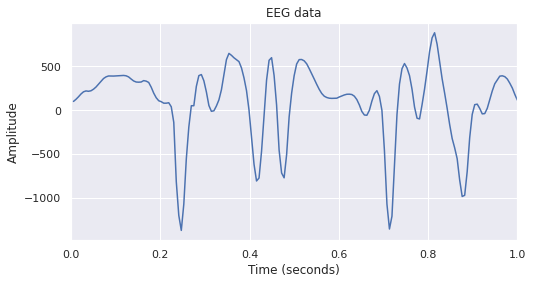

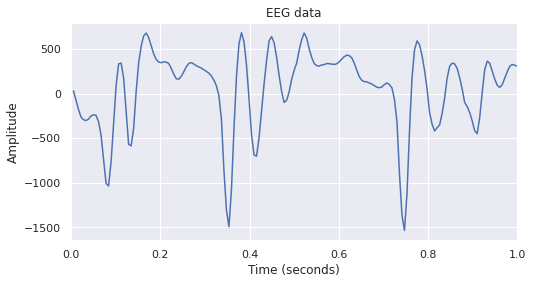

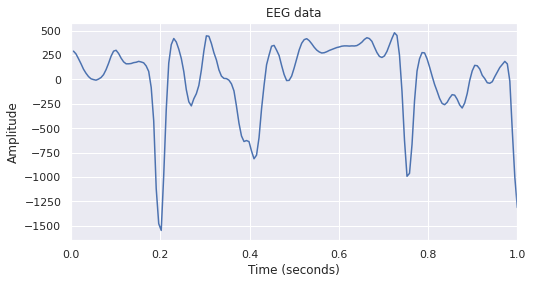

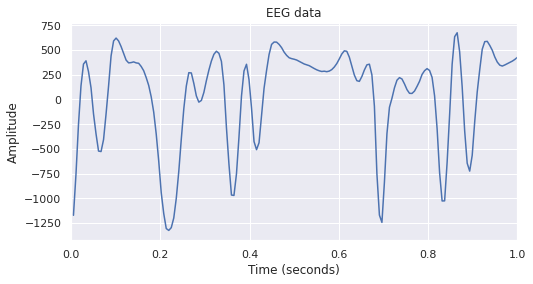

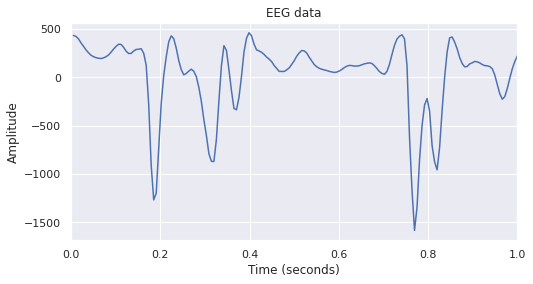

In [104]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

Plots for 5 datasets of the same patient on the same graph (To highlight diffenreces in phase)

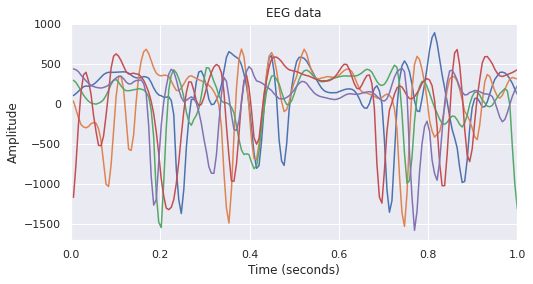

In [105]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 1])
plt.title('EEG data')

for i in range(0,5):
    
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    plt.plot(time, x)

Plots for datasets of the 5 different patient of class 1

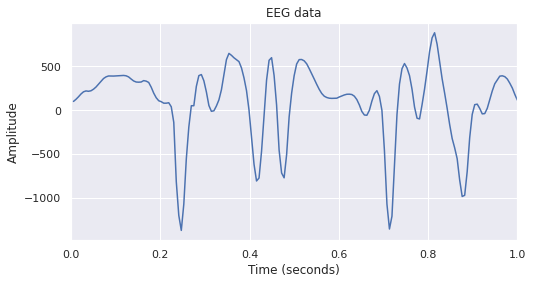

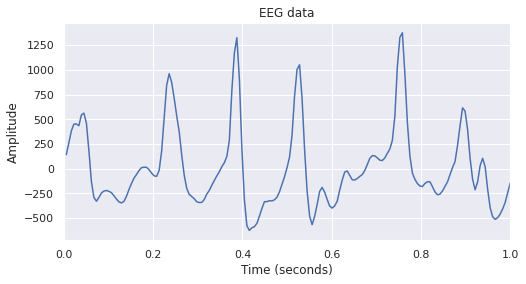

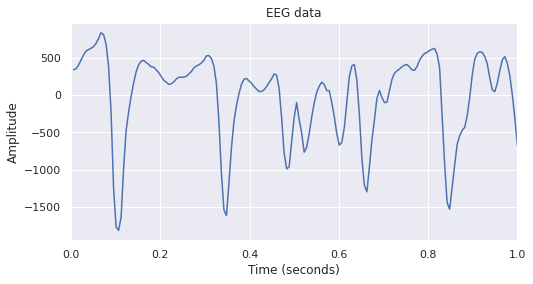

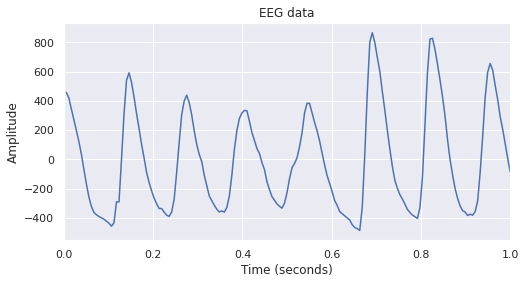

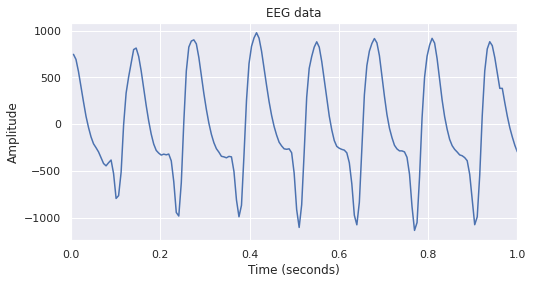

In [108]:
for i in range(0,115,23):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

**From this plot, we can observe that while members of class 1 have distinctly different graphs, there appears to be a regular spike/dip in each of the graphs. These occur approximately every 0.18 to 0.2s. This might be a distinct characteristic for epilepsy seizure that we can explore later on.**

From the graphs above, we can discover that while the profile of the EEG data is consistent for each patient, they are highly different from one another when compared to other patients even if they fall into the same class. Besides that, even for the same patient, we can see a noticeable phase difference. As such, machine learning algorithm might fail to capture these information.
Thus, it might be wiser to process the data in the frequency domain, and get fft etc, where such differences are taken into account.

Plots for datasets of the 5 different patient in each of the classes

class 1


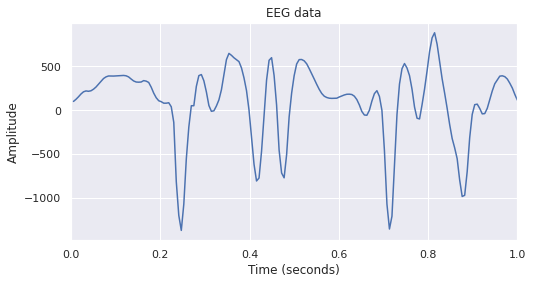

class 2


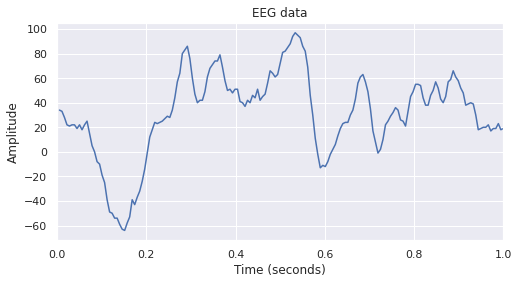

class 3


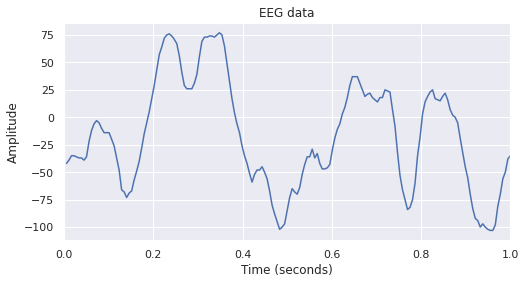

class 4


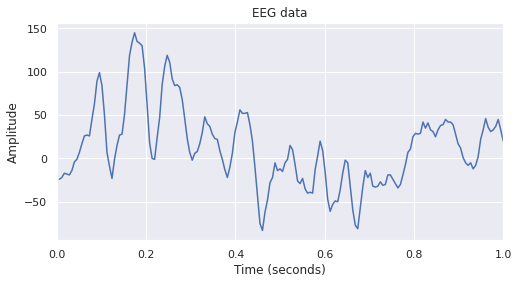

class 5


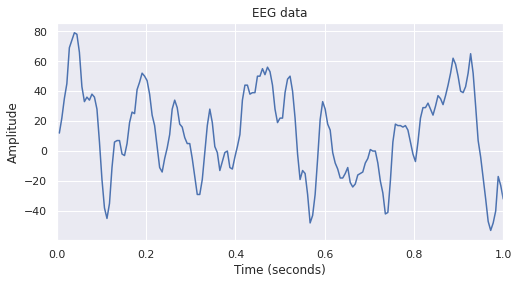

In [115]:
for i in range(0,5):
    print("class {}".format(i+1))
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[i].iloc[0][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

Simarly to analysis above, we can see distinctly different graphs when plotting each of the 5 classes. We can observe that class 1 seems to be distinctly different from the rest of the classes with extremely large amplitude changes and relatively smooth and regular graphs. The smoothness may be attributed to the extremely large amplitude changes which mask the small changes in amplitude when presented in a graph. Aside from that, it may be hard to differentitate the rest of the 4 classes at this point in time.

In [126]:
mean = {}
median = {}
std = {}
for i in range(0,5):
    stats =ep[i].drop(['Time','y'], axis=1).std(axis=1)
    mean["class{}".format(i+1)]=(stats.mean())
    median["class{}".format(i+1)]=(stats.median())
    std["class{}".format(i+1)]=(stats.std())

# Binary Classification using Time Series Data

Now that we have understood our data from data exploration, let's use ML algorithms for classification

Changing the values of the column "y" to either 1 or 0. Since we are performing Binary Classification to find whether a person is epilleptic or not, we need to find whether a row(EEG signal) belongs to class 1 or not.

Creating a new column "Result" which contains either 1 or 0(updated values of the column "y") and deleting the the column "y"


In [133]:
df = pd.read_csv('/content/data.csv')
df["Result"] = df.y==1 # Create a new column Results having value 1 if y == 1 and 0 if y!= 1
df["Result"] = df["Result"].astype(int)
df.pop("y")
df.drop(df.columns[0], axis=1, inplace=True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,Result
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,0


# Splitting the datasets into Train and Test Datasets

In [134]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df['Result']) 
X = df.drop(df.columns[178], axis=1, inplace=False)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.25)

In [135]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,...,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55


Data Preprocessing in order to be for data valid across different classification algorithms.

In [136]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Trying various classification algorithms

# 1.Gradient Boosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, 
                                    learning_rate=1.0, 
                                    max_depth=3,
                                    random_state=69
                                    )
gb_clf.fit(X_train, y_train)
print('Gradient Boosting Classifier')
print('Training:')

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier
Training:
Accuracy score (training): 1.000
Accuracy score (test): 0.968


# 2.Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9059710144927536

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9015652173913044

For Train Dataset
True Negatives= 6573
False Positives= 300
False Negatives= 511
True Positives= 1241

True Negative Rate = 0.9563509384548232
False Positive Rate = 0.04364906154517678
False Negative Rate = 0.2916666666666667
True Positive Rate = 0.7083333333333334

For Test Dataset
True Negatives= 2218
False Positives= 109
False Negatives= 174
True Positives= 374

True Negative Rate = 0.9531585732703051
False Positive Rate = 0.046841426729694886
False Negative Rate = 0.3175182481751825
True Positive Rate = 0.6824817518248175



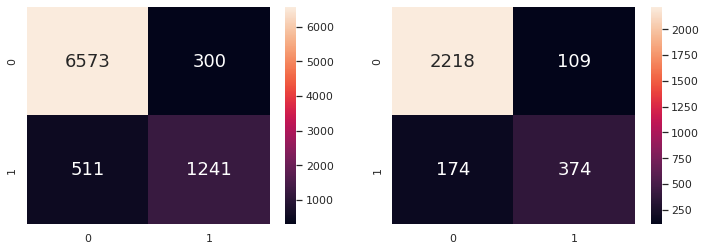

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("For Train Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))

tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("For Test Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()


# 3.Random Forest Classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9823768115942029

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.968



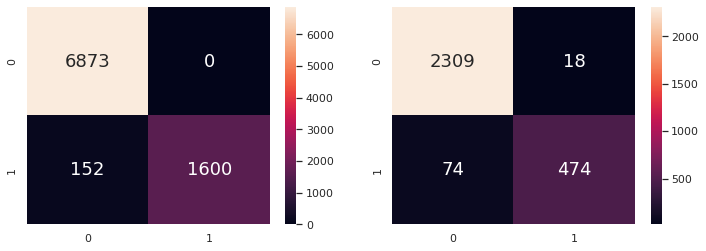

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 4.Extreme Random Forest Classification

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9971014492753624

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.976



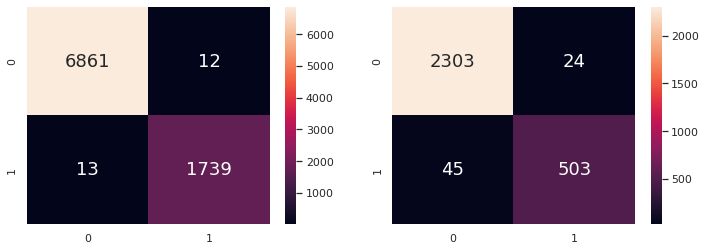

In [ ]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Conclusion

Conclusion: We can use Time Series Data to classify an EEG signal as epileptic or not as we were getting very high accuracies of most of the above tried classification algorithms. This is due to the huge variations in the datapoints as seen in the exploratory analysis before.

All the algorithms yielded very high classification accuracies with Extreme Random Forest having the highest classification accuracy of around 97%